__Data Science Capstone Project__

__BUSINESS UNDERSTANDING__

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations. In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides these reasons, weather, visibility, or road conditions are also the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads. The target audience of the project will be local government, police and car insurance companies. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries.

Here we have been given a dataset of all the accidents occured since 2004
With the help of the provided dataset we will try to predict that what are some of the main reasons behind those Severity.

Data Analysis

We have used the Seattle Collision dataset.

Dataset contains several attributes such as:

1.SEVERITYCODE
2.X
3.Y
4.OBJECTID
5.INCKEY
6.COLDETKEY
7.REPORTNO
8.STATUS
9.ADDRTYPE
10.INTKEY
11.LOCATION
12.EXCEPTRSNCODE
13.EXCEPTRSNDESC
14.SEVERITYCODE.1
15.SEVERITYDESC
16.COLLISIONTYPE
17.PERSONCOUNT
18.PEDCOUNT
19.PEDCYLCOUNT
20.VEHCOUNT
21.INCDATE
22.INCDTTM
23.JUNCTIONTYPE
24.SDOT_COLCODE
25.SDOR_COLDESC
26.INATTENTIONIND
27.UNDERINFL
28.WEATHER
29.ROADCOND
30.LIGHTCOND
31.PEDROWNOTGRNT
32.SDOTCOLUMN
33.SPEEDING
34.ST_COLCODE
35.ST_COLDESC
36.SEGLANEKEY
37.CROSSWALKKEY
38.HITPARKEDCAR

Our predictor or target variable will be 'SEVERITYCODE' because it is used to measure the severity of an accident i.e., 0/1 within the dataset.

0 - Property damage only.
1- Severe Injury

Attributes used to weigh the severity of an accident are ' WEATHER ', ' ROADCOND ', ' ADDRTYPE ' ,'COLLISIONTYPE' and 'LIGHTCOND'.

__Extract Dataset & Convert__

In it's original form, this data is not fit for analysis. For one, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type.

Let's import the Data Collision dataset

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)
df.head()
df.fillna(0)
df.columns

cdf=df[['SEVERITYCODE','WEATHER','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','ROADCOND', 'LIGHTCOND']]
cdf.head()

cdf.dropna(inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
cdf.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,2,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,1,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,1,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,1,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,2,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [4]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [5]:
import seaborn as sns

In [6]:
cdf.SEVERITYCODE=cdf.SEVERITYCODE.map(lambda SEVERITYCODE:SEVERITYCODE-1)
cdf.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,1,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,0,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,0,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,0,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,1,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [7]:
new=cdf[cdf.SEVERITYCODE==1]

In [8]:
new.ADDRTYPE.value_counts()
#From here we can see that severity occurs mostly at Block and Intersection type

Block           29252
Intersection    27344
Alley              29
Name: ADDRTYPE, dtype: int64

In [9]:
cdf.drop('JUNCTIONTYPE',axis=1,inplace=True)

new.drop(['JUNCTIONTYPE'],axis=1,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

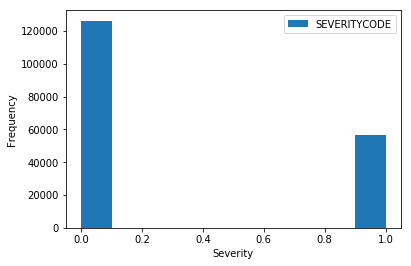

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
cdf.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [12]:
cdf.SEVERITYCODE.value_counts()

0    126270
1     56625
Name: SEVERITYCODE, dtype: int64

__Downsampling the inbalanced data__

In [13]:
from sklearn.utils import resample
dfmin=cdf[cdf.SEVERITYCODE==1]
dfmaj=cdf[cdf.SEVERITYCODE==0]
df_maj_down=resample(dfmaj,replace=False,n_samples=56657,random_state=123)
df_cust=pd.concat([dfmin,df_maj_down])

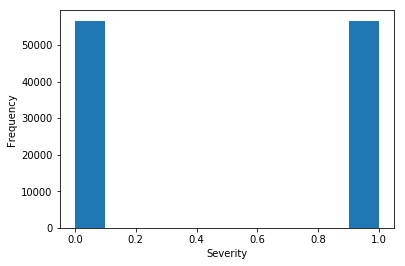

In [14]:
df_cust.SEVERITYCODE.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_cust = df_cust.reindex(np.random.permutation(df_cust.index))

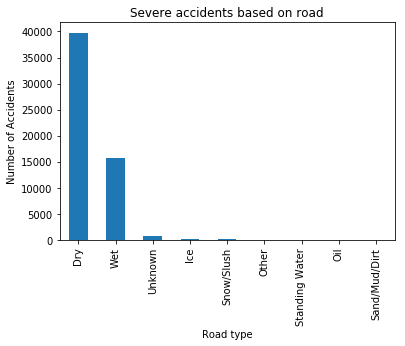

In [16]:
df_cust[df_cust.SEVERITYCODE==1].ROADCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on road')
plt.ylabel('Number of Accidents')
plt.xlabel('Road type')
plt.show()

__It displays that most of the severe accidents occured in dry road__

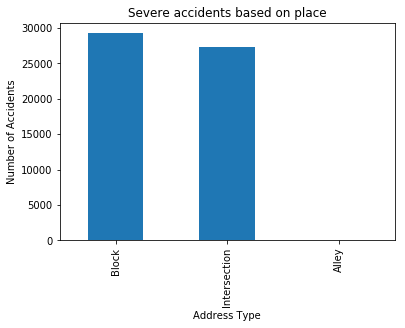

In [17]:
df_cust[df_cust.SEVERITYCODE==1].ADDRTYPE.value_counts().plot(kind='bar')
plt.title('Severe accidents based on place')
plt.ylabel('Number of Accidents')
plt.xlabel('Address Type')
plt.show()

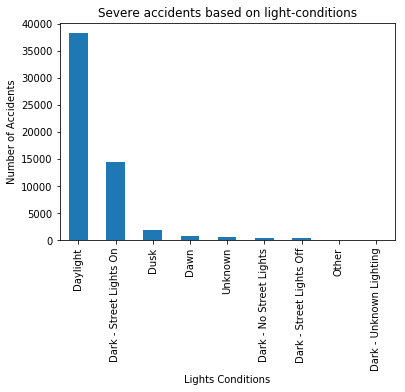

In [18]:
df_cust[df_cust.SEVERITYCODE==1].LIGHTCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on light-conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Lights Conditions')
plt.show()

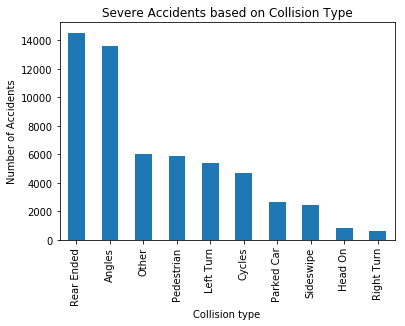

In [19]:
df_cust[df_cust.SEVERITYCODE==1].COLLISIONTYPE.value_counts().plot(kind='bar')
plt.title('Severe Accidents based on Collision Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Collision type')
plt.show()

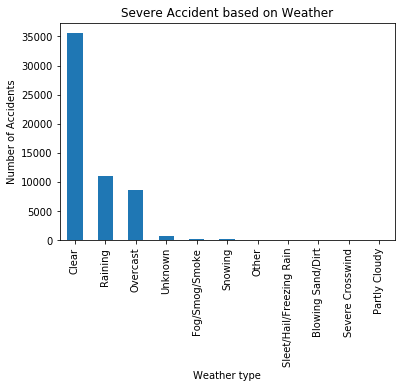

In [20]:
df_cust[df_cust.SEVERITYCODE==1].WEATHER.value_counts().plot(kind='bar')
plt.title('Severe Accident based on Weather')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather type')
plt.show()

In [21]:
df_cust.SEVERITYCODE.value_counts()

0    56657
1    56625
Name: SEVERITYCODE, dtype: int64

In [22]:
#no of unique values in each column:
for col in df_cust[0:]:
    print(col, ':' , len(df_cust[col].unique()))

SEVERITYCODE : 2
WEATHER : 11
ADDRTYPE : 3
COLLISIONTYPE : 10
ROADCOND : 9
LIGHTCOND : 9


__Count Frequency Encoding__

In [23]:
df_collision_freq=df_cust.COLLISIONTYPE.value_counts().to_dict()

In [24]:
df_cust.COLLISIONTYPE=df.COLLISIONTYPE.map(df_collision_freq)

In [25]:
df_cust.head(5)

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
166129,0,Raining,Block,13755.0,Wet,Daylight
177233,0,Clear,Block,13755.0,Dry,Daylight
26693,0,Clear,Block,9582.0,Dry,Daylight
40732,0,Clear,Intersection,9582.0,Dry,Daylight
108008,0,Raining,Intersection,22966.0,Wet,Daylight


In [26]:
df_road_freq=df_cust.ROADCOND.value_counts().to_dict()
df_cust.ROADCOND=df.ROADCOND.map(df_road_freq)

In [27]:
df_cust.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
166129,0,Raining,Block,13755.0,29561.0,Daylight
177233,0,Clear,Block,13755.0,76729.0,Daylight
26693,0,Clear,Block,9582.0,76729.0,Daylight
40732,0,Clear,Intersection,9582.0,76729.0,Daylight
108008,0,Raining,Intersection,22966.0,29561.0,Daylight


In [28]:
df_light_freq=df_cust.LIGHTCOND.value_counts().to_dict()

In [29]:
df_cust.LIGHTCOND=df_cust.LIGHTCOND.map(df_light_freq)

In [30]:
df_weather_freq=df_cust.WEATHER.value_counts().to_dict()
df_cust.WEATHER=df_cust.WEATHER.map(df_weather_freq)

In [31]:
addr_dummy=pd.get_dummies(df_cust.ADDRTYPE)
addr_dummy.head(3)

,Alley,Block,Intersection
166129,0,1,0
177233,0,1,0
26693,0,1,0


In [32]:
df_new=df_cust.reset_index()

In [33]:
#df_new.drop(['index','level_0'],axis=1,inplace=True)

In [34]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,166129,0,20705,Block,13755.0,29561.0,72061
1,177233,0,68555,Block,13755.0,76729.0,72061
2,26693,0,68555,Block,9582.0,76729.0,72061
3,40732,0,68555,Intersection,9582.0,76729.0,72061
4,108008,0,20705,Intersection,22966.0,29561.0,72061


In [35]:
addr_dummy=addr_dummy.reset_index()
addr_dummy.head(3)

,index,Alley,Block,Intersection
0,166129,0,1,0
1,177233,0,1,0
2,26693,0,1,0


In [36]:
addr_dummy.drop('index',axis=1,inplace=True)
addr_dummy.head(3)

,Alley,Block,Intersection
0,0,1,0
1,0,1,0
2,0,1,0


In [37]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,166129,0,20705,Block,13755.0,29561.0,72061
1,177233,0,68555,Block,13755.0,76729.0,72061
2,26693,0,68555,Block,9582.0,76729.0,72061
3,40732,0,68555,Intersection,9582.0,76729.0,72061
4,108008,0,20705,Intersection,22966.0,29561.0,72061


In [38]:
df_new2=pd.concat([df_new,addr_dummy],axis=1)

In [39]:
df_new2.drop('ADDRTYPE',axis=1,inplace=True)
df_new2.head()

,index,SEVERITYCODE,WEATHER,COLLISIONTYPE,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,166129,0,20705,13755.0,29561.0,72061,0,1,0
1,177233,0,68555,13755.0,76729.0,72061,0,1,0
2,26693,0,68555,9582.0,76729.0,72061,0,1,0
3,40732,0,68555,9582.0,76729.0,72061,0,0,1
4,108008,0,20705,22966.0,29561.0,72061,0,0,1


In [40]:
df_new2.columns=[col.upper() for col in df_new2.columns]

In [41]:
df_new2.columns

Index(['INDEX', 'SEVERITYCODE', 'WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION'],
      dtype='object')

In [42]:
x_data=df_new2[['WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION']]
y_data=df_new2['SEVERITYCODE']
print(x_data.head(3),y_data.head(3))

   WEATHER  COLLISIONTYPE  ROADCOND  LIGHTCOND  ALLEY  BLOCK  INTERSECTION
0    20705        13755.0   29561.0      72061      0      1             0
1    68555        13755.0   76729.0      72061      0      1             0
2    68555         9582.0   76729.0      72061      0      1             0 0    0
1    0
2    0
Name: SEVERITYCODE, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

__Normalizing x_data__

In [44]:
s=StandardScaler()
s.fit(x_data)
x_scale=s.transform(x_data)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [45]:
x_scale

array([[-1.07291366, -0.46130991, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -0.46130991,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -1.06793459,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       ...,
       [-1.21743433,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366, -2.25792493, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366, -1.06793459, -1.21970605, ..., -0.03242808,
        -1.26550097,  1.26831446]])

__Model Selection__

__Decision Tree__

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y_data,test_size=0.2,random_state=1)

In [48]:
xtrain

array([[-1.21743433, -1.14716068,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -0.46130991,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       ...,
       [ 0.80013996,  0.87768362,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [-1.07291366,  0.88858629, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366,  0.87768362, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ]])

In [49]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
yhat=dt.predict(xtest)

In [51]:
from sklearn import metrics
from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score
print('F1 Score:',f1_score(ytest,yhat,average='weighted'))
print('Accuracy-Score:', metrics.accuracy_score(ytest,yhat))

F1 Score: 0.6944231074797295
Accuracy-Score: 0.6957673125303439


In [52]:
yhat[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

__K-Nearest Neighbour__

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
li={}
for k in range(1,10):
    neig=KNeighborsClassifier(n_neighbors=k).fit(xtrain,ytrain)
    yhat=neig.predict(xtest)
    acc_score=metrics.accuracy_score(ytest,yhat)
    li[k]=acc_score
print(li)

In [ ]:
best_k = max(li, key=li.get)
best_k

In [ ]:
neig=KNeighborsClassifier(n_neighbors=best_k).fit(xtrain,ytrain)
yhat=neig.predict(xtest)
print('Best K for KNN model :',best_k,
      '\nCorresponding Accuracy:',metrics.accuracy_score(ytest,yhat))

__Logistic Regression__

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)

In [ ]:
print('f1 score:',metrics.f1_score(ytest,yhat))
print('Accuracy score:',metrics.accuracy_score(ytest,yhat))

__Support Vector Machines (SVM)__

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)
yhat_svm=clf.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf=confusion_matrix(ytest,yhat_svm)
np.set_printoptions(precision=2)
print('Classification Report:\n',classification_report(ytest,yhat_svm))

In [ ]:
print('f1 score:' , metrics.f1_score(ytest,yhat_svm))

In [ ]:
print('Accuracy_score:',metrics.accuracy_score(ytest,yhat_svm))